## IMU Orientation

References:
https://www.mathworks.com/help/fusion/examples/logged-sensor-data-alignment-for-orientation-estimation.html


In [ ]:
 # Python Software Package Installation
import sys
!{sys.executable} -m pip install adafruit-circuitpython-lsm6dsox ipympl

**Verify this cell returns acceleration data before proceeding**

In [95]:
# Set an Environment Variable so Adafruit Blinka knows we're using the MCP2221
import os
os.environ["BLINKA_MCP2221"] = "1"

# Import CircuitPython Libraries
import board
import busio
import adafruit_lsm6dsox

i2c = busio.I2C(board.SCL, board.SDA)
sox = adafruit_lsm6dsox.LSM6DSOX(i2c)

print("Acceleration: X:%.2f, Y: %.2f, Z: %.2f m/s^2"%(sox.acceleration))
print("Gyro: X:%.2f, Y: %.2f, Z: %.2f degrees/s"%(sox.gyro))

print(sox.gyro[1])

import numpy as np

np.radians(sox.gyro)

Acceleration: X:3.40, Y: 8.21, Z: -4.19 m/s^2
Gyro: X:1.05, Y: -0.46, Z: -0.31 degrees/s
-0.46375


array([ 0.02779437, -0.01298089, -0.00595594])

<IPython.core.display.Javascript object>


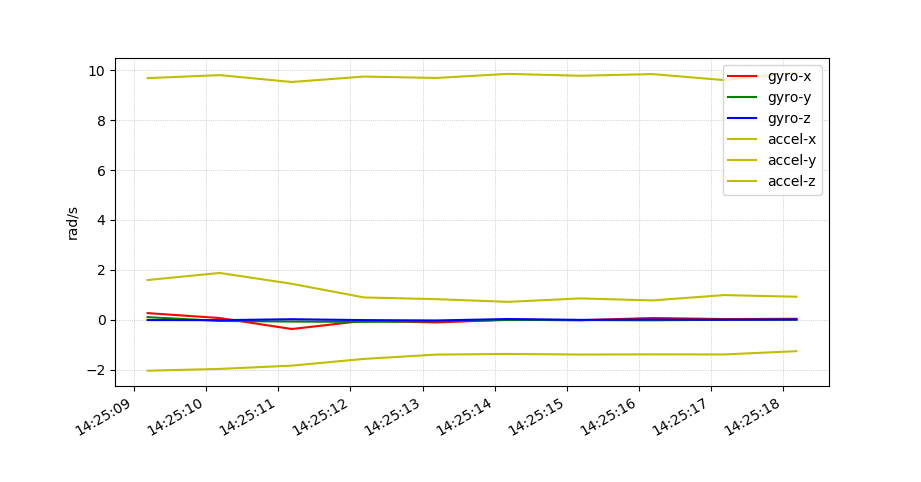

In [101]:
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import datetime
import matplotlib.patches as mpatches
import matplotlib.dates as mdates
from collections import deque

# How many sensor samples we want to store
HISTORY_SIZE = 10

# Pause re-sampling the sensor and drawing for INTERVAL seconds
INTERVAL = 0.03

# Deque for X-Axis (time)
x_vals = deque(maxlen=HISTORY_SIZE)

# Deque for gyros
gyro_x = deque(maxlen=HISTORY_SIZE)
gyro_y = deque(maxlen=HISTORY_SIZE)
gyro_z = deque(maxlen=HISTORY_SIZE)

# Deque for accel
accel_x = deque(maxlen=HISTORY_SIZE)
accel_y = deque(maxlen=HISTORY_SIZE)
accel_z = deque(maxlen=HISTORY_SIZE)

# Create 3 side-by-side subplots
fig, ax = plt.subplots()


def animate(i):
    # Poll the LSM6DSOX
    gyro_data = sox.gyro
    accel_data = sox.acceleration
    
    # Convert to radians
    gyro_data = np.radians(gyro_data)
    
    # Add the X/Y/Z values to the gyro deques
    gyro_x.append(gyro_data[0])
    gyro_y.append(gyro_data[1])
    gyro_z.append(gyro_data[2])
    
    # Add the X/Y/Z values to the accel deques
    accel_x.append(accel_data[0])
    accel_y.append(accel_data[1])
    accel_z.append(accel_data[2])
    
    # Grab the datetime, auto-range based on length of accel_x array
    x_vals = [datetime.datetime.now() + datetime.timedelta(seconds=i) for i in range(len(gyro_x))]
    
    # Clear axis
    ax.cla()

    # Enable subplot grid lines
    ax.grid(True, linewidth=0.5, linestyle=':')

    plt.ylabel('rad/s')

    # Rotate and align x-axis tick labels so they look better
    fig.autofmt_xdate()

    # Plot the gyro values
    plt.plot(x_vals, gyro_x, color='r', label='gyro-x')
    plt.plot(x_vals, gyro_y, color='g', label='gyro-y')
    plt.plot(x_vals, gyro_z, color='b', label='gyro-z')
    
    # Plot the accel values
    plt.plot(x_vals, accel_x, color='y', label='accel-x')
    plt.plot(x_vals, accel_y, color='y', label='accel-y')
    plt.plot(x_vals, accel_z, color='y', label='accel-z')
    
    
    # Add graph legends
    ax.legend(loc='upper right')
    
    # Pause the plot for INTERVAL seconds 
    plt.pause(INTERVAL)

# Update graph every 125ms
ani = FuncAnimation(fig, animate)